## EDA for Apple Images

#### Folder structure:

apple - Ashwitha

--healthy

--rust

--scab

--EDA_apple.ipynb

### Importing necessary libraries

In [11]:
import os
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import pandas as pd
import numpy as np
import random
import cv2

Initializing folder paths for access & printing the number of images in each folder

In [5]:
healthy = "healthy/"
rust = "rust/"
scab = "scab/" 
print("Healthy folder: " + str(len(os.listdir(healthy))))
print("Rust folder: " + str(len(os.listdir(rust))))
print("Scab folder: " + str(len(os.listdir(scab))))

Healthy folder: 516
Rust folder: 622
Scab folder: 592


In [16]:
# Initialize list for the folders
folders = ["healthy", "scab", "rust"]

#### Plotting the ditribution of the Apple Images

There are three types of Apple Images - Healthy, Rust, Scab (all leaves)

In [14]:
number_folders = {'Healthy': len(os.listdir(healthy)),
'rust': len(os.listdir(rust)),
'scab': len(os.listdir(scab))}

Text(0, 0.5, '# Images')

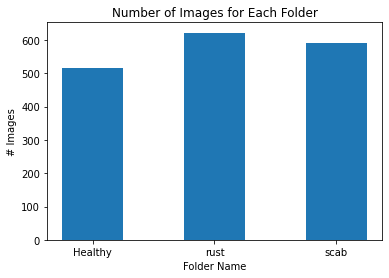

In [15]:
plt.bar(number_folders.keys(), number_folders.values(), width = .5)
plt.title("Number of Images for Each Folder")
plt.xlabel('Folder Name')
plt.ylabel('# Images')

#### Plotting the image sizes for each of the folders

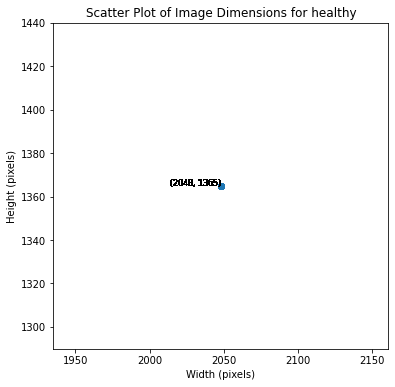

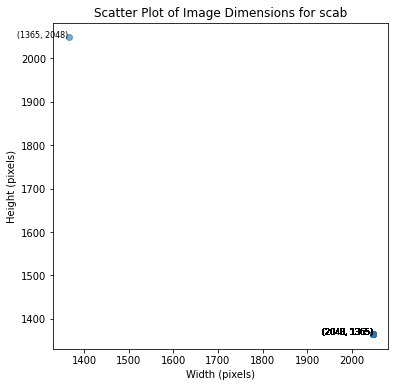

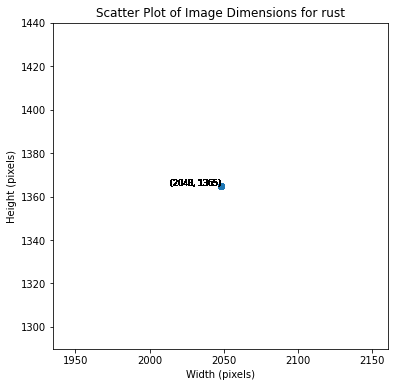

In [17]:
# Traverse the directory and collect image dimensions
for folder in folders:
    widths = []
    heights = []
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
        # Construct full file path
            file_path = os.path.join(folder, filename)
        
        # Open the image file
            with Image.open(file_path) as img:
            # Get width and height
                width, height = img.size
            
            # Append to lists
                widths.append(width)
                heights.append(height)

# Create a scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(widths, heights, alpha=0.6)

# Label the axes
    plt.xlabel('Width (pixels)')
    plt.ylabel('Height (pixels)')

# Title of the plot
    plt.title('Scatter Plot of Image Dimensions for '+ str(folder))

# Text labels for scatterplot points
    [plt.text(i, j, f'({i}, {j})', fontsize=8, ha='right') for (i, j) in zip(widths, heights)]
        

# Display the plot
    plt.show()

#### Visual Inspection of Random Samples for the three folders

Random Visual Inspection for: healthy


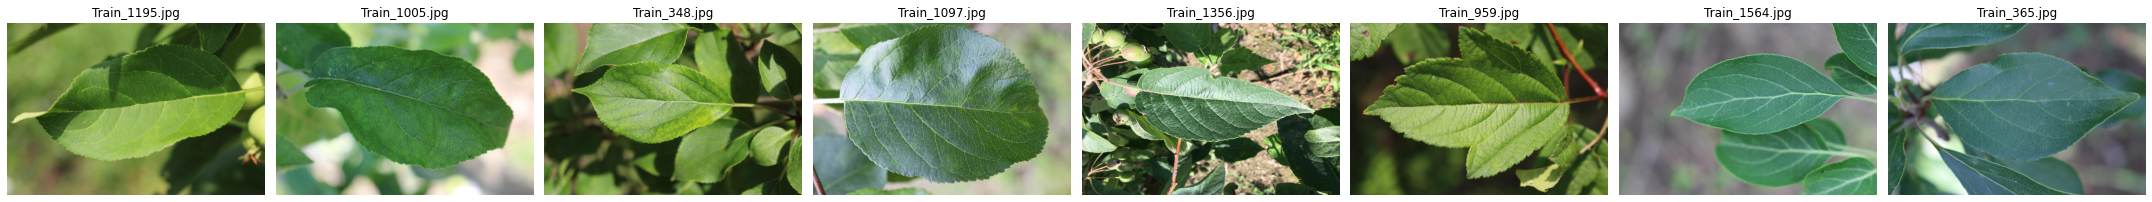

Random Visual Inspection for: scab


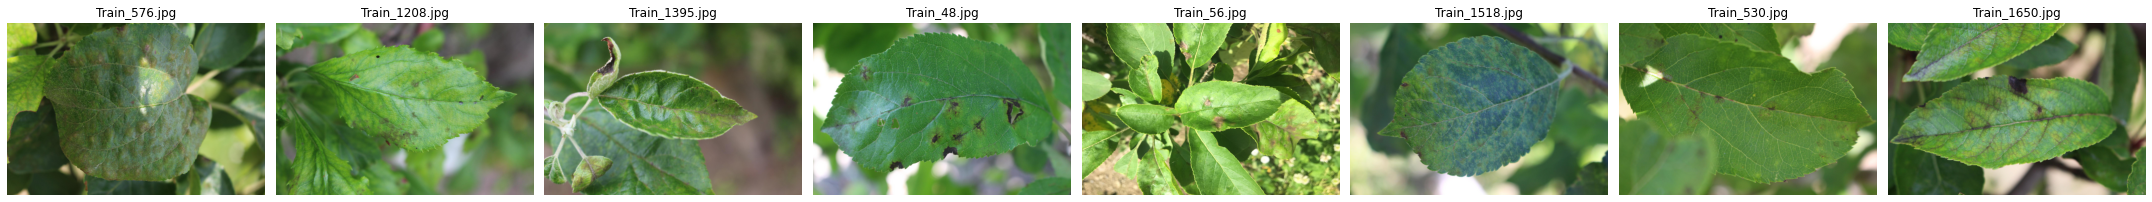

Random Visual Inspection for: rust


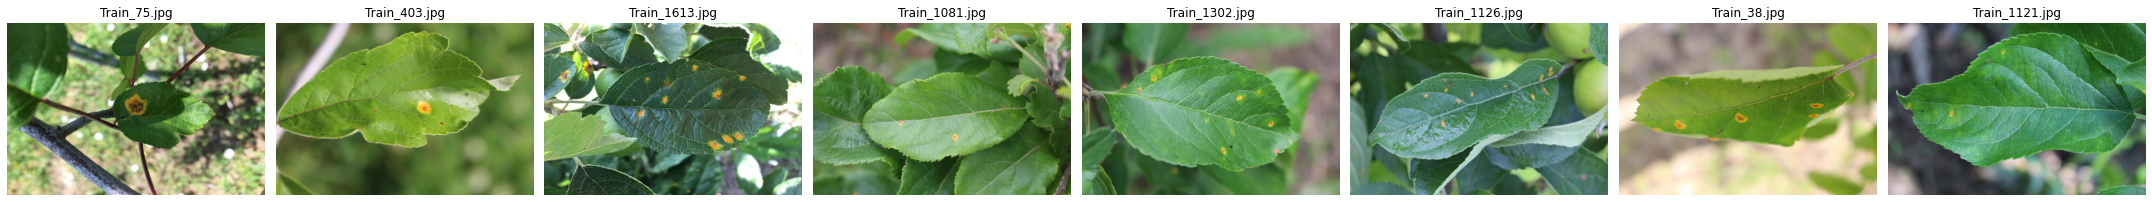

In [18]:
for folder in folders:
    num_samples = 8  # Number of random samples to display
    print("Random Visual Inspection for: " + str(folder))
# Get a list of all image files in the folder
    image_files = [f for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff'))]

# Select random samples
    random_samples = random.sample(image_files, min(len(image_files), num_samples))

# Create a figure to display the images
    plt.figure(figsize=(30, 20))

# Loop through the random samples and display each image
    for i, filename in enumerate(random_samples):
    # Construct full file path
        file_path = os.path.join(folder, filename)
    
    # Open the image file
        img = Image.open(file_path)
    
    # Add a subplot for each image
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.axis('off')  # Hide the axes
        plt.title(filename)  # Show the filename as the title

# Adjust layout to prevent overlap
    plt.tight_layout()

# Display the plot
    plt.show()


#### Visualizing the RGB Distribution for the Apple Images

In [ ]:
# Function to extract RGB values from an image using OpenCV
def extract_rgb_values(image_path):
    img = cv2.imread(image_path)
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

# Function to update histograms with RGB values
def update_histograms(image_path, red_hist, green_hist, blue_hist):
    img = extract_rgb_values(image_path)
    red_hist += cv2.calcHist([img], [0], None, [256], [0, 256]).flatten()
    green_hist += cv2.calcHist([img], [1], None, [256], [0, 256]).flatten()
    blue_hist += cv2.calcHist([img], [2], None, [256], [0, 256]).flatten()
    return red_hist, green_hist, blue_hist

RGB Histograms for healthy :


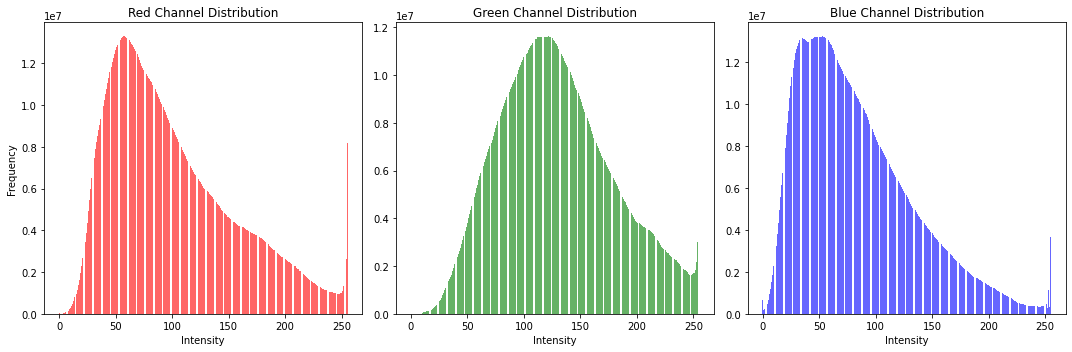

RGB Histograms for scab :


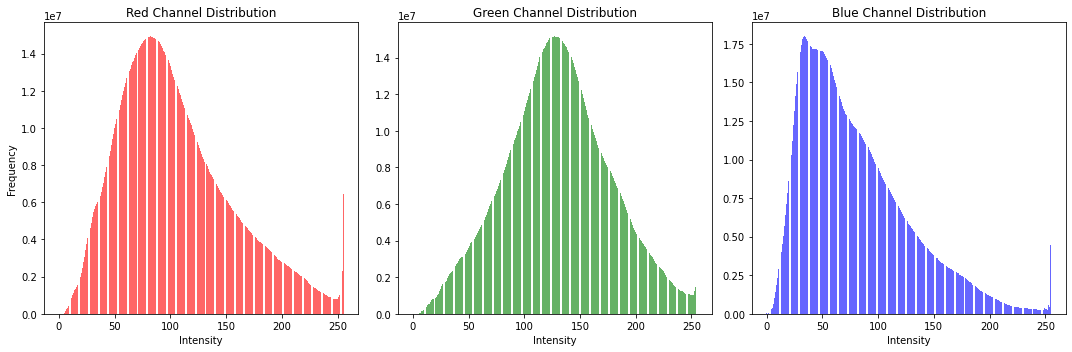

RGB Histograms for rust :


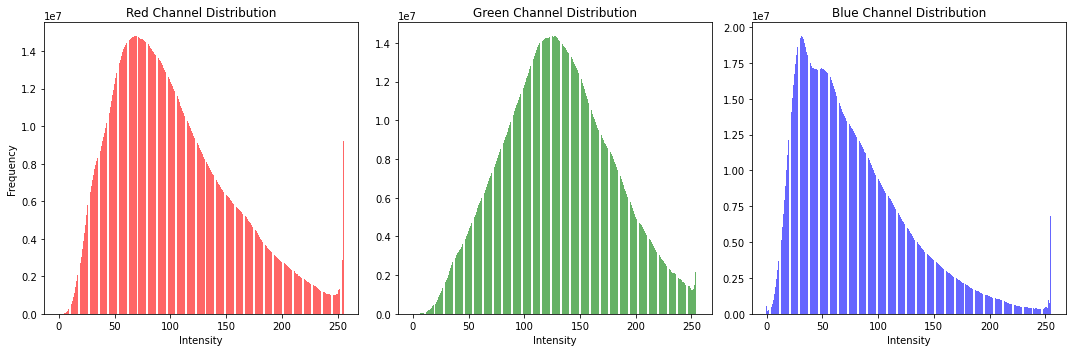

In [19]:
# Traversing each folder in the folder list
for folder_path in folders:
    # Initialize histograms for RGB values
    red_hist = np.zeros(256)
    green_hist = np.zeros(256)
    blue_hist = np.zeros(256)

    # Traverse the directory and process images
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            # Construct full file path
            file_path = os.path.join(folder_path, filename)
            # Update histograms
            red_hist, green_hist, blue_hist = update_histograms(file_path, red_hist, green_hist, blue_hist)

    
    print("RGB Histograms for "+ str(folder_path)+ " :")
    # Plot the RGB histograms
    plt.figure(figsize=(15, 5))

    # Plot Red values
    plt.subplot(1, 3, 1)
    plt.bar(range(256), red_hist, color='red', alpha=0.6)
    plt.title('Red Channel Distribution')
    plt.xlabel('Intensity')
    plt.ylabel('Frequency')

    # Plot Green values
    plt.subplot(1, 3, 2)
    plt.bar(range(256), green_hist, color='green', alpha=0.6)
    plt.title('Green Channel Distribution')
    plt.xlabel('Intensity')

    # Plot Blue values
    plt.subplot(1, 3, 3)
    plt.bar(range(256), blue_hist, color='blue', alpha=0.6)
    plt.title('Blue Channel Distribution')
    plt.xlabel('Intensity')

    # Adjust layout and display the plot
    plt.tight_layout()  
    plt.show()


#### Checking the Blurriness of the Images

In [ ]:
# Function to detect blurriness using the variance of the Laplacian
def detect_blurriness(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    laplacian_var = cv2.Laplacian(img, cv2.CV_64F).var()
    return laplacian_var

PLotting the blurriness values for: healthy


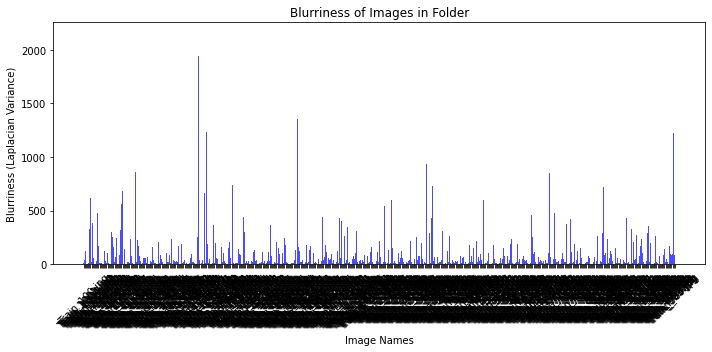

Image name: Train_100.jpg ; Blurriness value: 14.213785986092853
Image name: Train_1001.jpg ; Blurriness value: 36.78593212846657
Image name: Train_1002.jpg ; Blurriness value: 124.94648067844115
Image name: Train_1004.jpg ; Blurriness value: 1009.8936675467272
Image name: Train_1005.jpg ; Blurriness value: 11.119438959426828
Image name: Train_1007.jpg ; Blurriness value: 329.5383971292515
Image name: Train_1012.jpg ; Blurriness value: 617.1998335515206
Image name: Train_1014.jpg ; Blurriness value: 18.60249003240457
Image name: Train_1017.jpg ; Blurriness value: 383.07969105906176
Image name: Train_1020.jpg ; Blurriness value: 55.48105785631054
Image name: Train_103.jpg ; Blurriness value: 47.276496322147125
Image name: Train_1031.jpg ; Blurriness value: 26.387593714376187
Image name: Train_1034.jpg ; Blurriness value: 476.07793355000535
Image name: Train_1039.jpg ; Blurriness value: 173.50556640536868
Image name: Train_1043.jpg ; Blurriness value: 11.492453996414339
Image name: Train

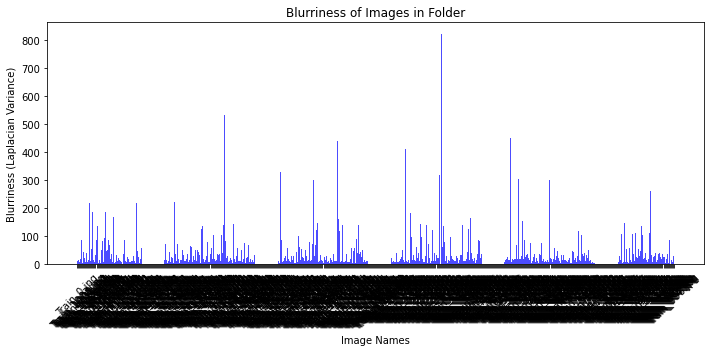

Image name: Train_0.jpg ; Blurriness value: 11.083868774342081
Image name: Train_1003.jpg ; Blurriness value: 15.746070453817838
Image name: Train_1006.jpg ; Blurriness value: 7.89151460481401
Image name: Train_1008.jpg ; Blurriness value: 17.55908415737354
Image name: Train_1009.jpg ; Blurriness value: 86.27208211574414
Image name: Train_101.jpg ; Blurriness value: 5.199616141983838
Image name: Train_1010.jpg ; Blurriness value: 45.54563300068166
Image name: Train_1015.jpg ; Blurriness value: 23.18325928476633
Image name: Train_1016.jpg ; Blurriness value: 6.796214657213972
Image name: Train_1024.jpg ; Blurriness value: 42.09123272523526
Image name: Train_1025.jpg ; Blurriness value: 6.657479455399545
Image name: Train_1026.jpg ; Blurriness value: 16.708740413224415
Image name: Train_1027.jpg ; Blurriness value: 218.52127794246692
Image name: Train_1032.jpg ; Blurriness value: 12.596848158983457
Image name: Train_1033.jpg ; Blurriness value: 54.10838806200752
Image name: Train_1036.jp

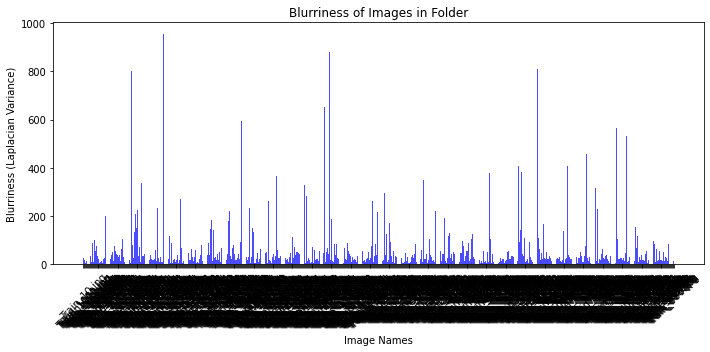

Image name: Train_10.jpg ; Blurriness value: 24.540708705270625
Image name: Train_1000.jpg ; Blurriness value: 18.179190272594187
Image name: Train_1011.jpg ; Blurriness value: 3.5812377076674307
Image name: Train_1019.jpg ; Blurriness value: 14.788051230934856
Image name: Train_102.jpg ; Blurriness value: 11.921790936712563
Image name: Train_1021.jpg ; Blurriness value: 36.838519482573155
Image name: Train_1022.jpg ; Blurriness value: 10.4308032116495
Image name: Train_1023.jpg ; Blurriness value: 11.959900836629032
Image name: Train_1029.jpg ; Blurriness value: 32.657002975966776
Image name: Train_1030.jpg ; Blurriness value: 10.853762805629799
Image name: Train_1037.jpg ; Blurriness value: 88.11880470155482
Image name: Train_1040.jpg ; Blurriness value: 9.199496667043354
Image name: Train_1041.jpg ; Blurriness value: 99.62207209888004
Image name: Train_1048.jpg ; Blurriness value: 53.56195841734236
Image name: Train_1051.jpg ; Blurriness value: 74.65258945443117
Image name: Train_10

In [21]:
# Define the path to your images folder
for folder_path in folders:
    # Lists to store image names and their corresponding blurriness values
    image_names = []
    blurriness_values = []

    # Traverse the directory and process images
    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif', '.tiff')):
            # Construct full file path
            file_path = os.path.join(folder_path, filename)
            # Detect blurriness
            blurriness = detect_blurriness(file_path)
            # Store image name and blurriness value
            image_names.append(filename)
            blurriness_values.append(blurriness)

    print("PLotting the blurriness values for: "+ str(folder_path))
    # Plot the blurriness values
    plt.figure(figsize=(10, 5))
    plt.bar(image_names, blurriness_values, color='blue', alpha=0.7)
    plt.xlabel('Image Names')
    plt.ylabel('Blurriness (Laplacian Variance)')
    plt.title('Blurriness of Images in Folder')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to fit labels
    plt.show()

    # Printing the blurriness values for easier read
    # Will later modify this function to print blur value above a certain threshold to detect blurry images
    for im_name, blur_value in zip(image_names, blurriness_values):
        print("Image name: " + str(im_name) + " ; Blurriness value: " + str(blur_value))
